# Mean-Variance Optimization

In [24]:
import pandas as pd 
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns

## Get Data

In [25]:
tickers = {'Bitcoin':'BTC-USD', 'Bitcoin Cash':'BCH-USD',
                 'Ethereum':'ETH-USD','Litecoin':'LTC-USD',
                 'Tron':'TRX-USD',
                 'Binance Coin':'BNB-USD',
                 'Ripple':'XRP-USD','Cardano':'ADA-USD',
                 'Stellar':'XLM-USD','Monero':'XMR-USD',
                  'Chainlink':'LINK-USD','Dogecoin':'DOGE-USD', 
                   'Polkadot':'DOT1-USD'}

In [26]:
# set the start and end dates of the desired financial data
start = datetime.datetime(2020,11,1)
end = datetime.datetime(2021,1,1)

#tickers is a dictionary of the desired crypto currenceies and their yahoo tickers
tickers = {'Bitcoin':'BTC-USD', 'Bitcoin Cash':'BCH-USD',
                 'Ethereum':'ETH-USD','Litecoin':'LTC-USD',
                 'Tron':'TRX-USD',
                 'Binance Coin':'BNB-USD',
                 'Ripple':'XRP-USD','Cardano':'ADA-USD',
                 'Stellar':'XLM-USD','Monero':'XMR-USD',
                  'Chainlink':'LINK-USD','Dogecoin':'DOGE-USD', 
                   'Polkadot':'DOT1-USD'}

In [79]:
# the code below downloads the desired data
def get_data(tickers, start, end):
    crypto_prices = web.DataReader(list(tickers.values())[0], 'yahoo', start, end).reset_index()[['Date','Close']]
    crypto_volume = web.DataReader(list(tickers.values())[0], 'yahoo', start, end).reset_index()[['Date','Volume']]
    for ticker in list(tickers.values())[1:]:
        data = web.DataReader(ticker, 'yahoo', start, end).reset_index()
#         price = web.DataReader(ticker, 'yahoo', start, end).reset_index()[['Date','Close']]
        price = data[['Date','Close']]
        volume = data[['Date','Volume']]
        crypto_prices = crypto_prices.merge(price, left_on='Date', right_on='Date', how='outer')
        crypto_volume = crypto_volume.merge(volume, left_on='Date', right_on='Date', how='outer')
    crypto_prices = crypto_prices.set_index('Date')
    crypto_prices.columns = list(tickers.keys())
    crypto_volume = crypto_volume.set_index('Date')
    crypto_volume.columns = list(tickers.keys())
    return crypto_prices, crypto_volume 

prices, volume = get_data(tickers, start, end)

## Data Exploration

In [80]:
moving30 =  prices.rolling(window=30).mean()
moving90 = prices.rolling(window=90).mean()
daily_pc = prices.pct_change(1)
returns = prices/prices.shift(1)
log_ret = np.log(returns)
corr = log_ret.corr()

In [81]:
prices.pct_change(1).corr()

,Bitcoin,Bitcoin Cash,Ethereum,Litecoin,Tron,Binance Coin,Ripple,Cardano,Stellar,Monero,Chainlink,Dogecoin,Polkadot
Bitcoin,1.000000,0.567544,0.654754,0.739096,0.494020,0.558567,0.271280,0.492941,0.320557,0.594981,0.522279,0.423652,0.393287
Bitcoin Cash,0.567544,1.000000,0.770676,0.679776,0.850492,0.758489,0.672951,0.683112,0.600191,0.585986,0.762572,0.421884,0.474469
Ethereum,0.654754,0.770676,1.000000,0.740597,0.756625,0.700886,0.556530,0.790486,0.469854,0.570489,0.836041,0.363696,0.588726
Litecoin,0.739096,0.679776,0.740597,1.000000,0.625445,0.680187,0.486143,0.581844,0.386222,0.538668,0.692516,0.352709,0.414204
Tron,0.494020,0.850492,0.756625,0.625445,1.000000,0.708686,0.836193,0.719774,0.796254,0.559785,0.839287,0.412470,0.450939
Binance Coin,0.558567,0.758489,0.700886,0.680187,0.708686,1.000000,0.471671,0.786418,0.599624,0.518127,0.676522,0.319382,0.547826
Ripple,0.271280,0.672951,0.556530,0.486143,0.836193,0.471671,1.000000,0.580447,0.757230,0.342811,0.648467,0.317953,0.277948
Cardano,0.492941,0.683112,0.790486,0.581844,0.719774,0.786418,0.580447,1.000000,0.582528,0.579552,0.687400,0.261438,0.617255
Stellar,0.320557,0.600191,0.469854,0.386222,0.796254,0.599624,0.757230,0.582528,1.000000,0.368317,0.570311,0.294908,0.243521
Monero,0.594981,0.585986,0.570489,0.538668,0.559785,0.518127,0.342811,0.579552,0.368317,1.000000,0.463062,0.236291,0.476959


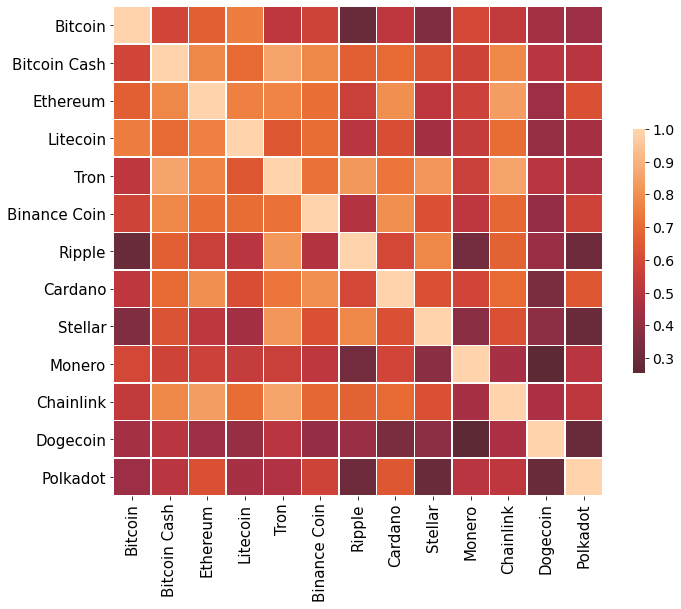

In [82]:
font = {'size' : 14}
plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(corr,cbar_kws={"shrink": .5},linewidths=.5,square=True, center=0 )
ax.tick_params(labelsize=15)

## Monte Carlo Simulation

In [83]:
def monte_carlo(log_ret, n_portfolios=5000):
    n_currencies = log_ret.shape[1]
    # Mean Log Return
    mean_log_ret = log_ret.mean()
    # Covariance Matrix
    sigma = log_ret.cov()
    # Weight Matrix
    all_weights = np.zeros((n_portfolios,n_currencies))
    # Expected Return array
    ret_arr = np.zeros(n_portfolios)
    # Expected Volatility array
    vol_arr = np.zeros(n_portfolios)
    # Sharpe Ratio array
    sharpe_arr = np.zeros(n_portfolios) 
    
    for k in range(n_portfolios):
        # Weights
        weights = np.array(np.random.random(n_currencies))
        weights = weights/np.sum(weights)
        # Save Weights
        all_weights[k,:] = weights
        # Expected Log Returns
        ret_arr[k] = np.sum(mean_log_ret * weights * 356)
        # expected volatility
        vol_arr[k] = np.sqrt(np.dot(weights.T, np.dot(sigma*365,weights)))
        #sharpe ratio
        sharpe_arr[k] = ret_arr[k]/vol_arr[k]
            
    return ret_arr, vol_arr, sharpe_arr, all_weights
 

In [84]:
ret_arr, vol_arr, sharpe_arr, best_weights = monte_carlo(log_ret, n_portfolios=50000)
max_index = sharpe_arr.argmax()

In [85]:
best_weights[max_index]

array([0.16780278, 0.02681002, 0.12887145, 0.17398755, 0.02575437,
       0.0512066 , 0.01366783, 0.05523107, 0.01029111, 0.04877476,
       0.00241991, 0.16761853, 0.12756403])

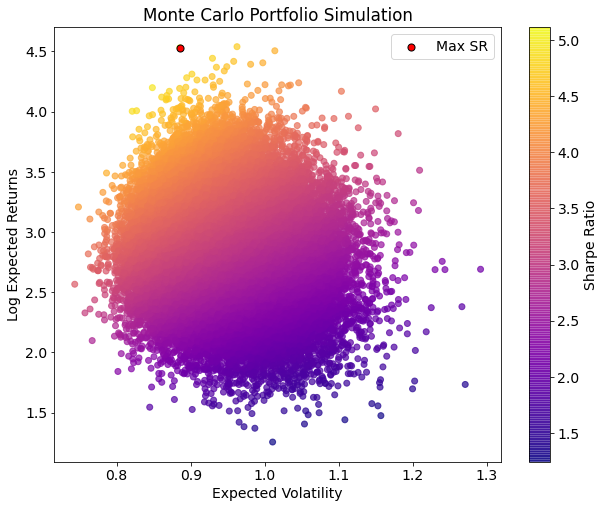

In [86]:
plt.figure(figsize=(10,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma', alpha=.7)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(vol_arr[max_index], 
            ret_arr[max_index], c='red', s=50, edgecolors='black', label='Max SR')
plt.xlabel('Expected Volatility')
plt.ylabel('Log Expected Returns')
plt.title('Monte Carlo Portfolio Simulation')
plt.legend()

### Efficient Frontier

In [87]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

frontier_y = np.linspace(ret_arr.min() -.5, ret_arr.max()+.5, 50)
frontier_volatility = []

for possible_return in frontier_y:
    constraints = ({'type':'eq', 'fun': check_sum}, 
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    result = minimize(minimize_volatility, x0,  method='SLSQP', 
                       bounds=bounds, constraints=constraints)
    frontier_volatility.append(result['fun'])

Text(0.5, 1.0, 'Efficient Frontier')

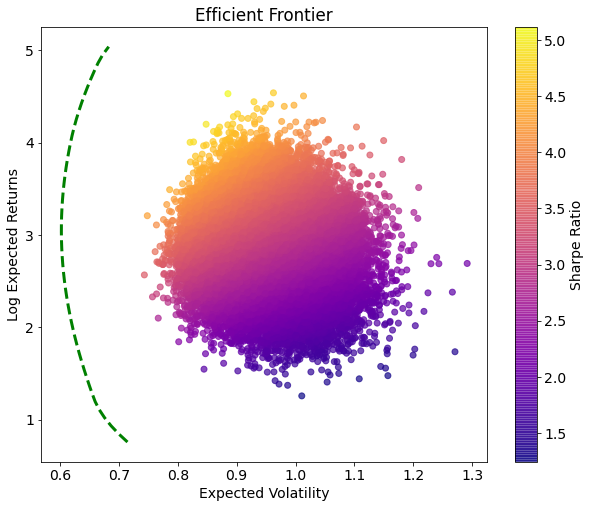

In [88]:
plt.figure(figsize=(10,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma', alpha=.7)
plt.colorbar(label='Sharpe Ratio')
# plt.scatter(vol_arr[max_index], 
#             ret_arr[max_index], c='red', s=50, edgecolors='black', label='Max SR')
plt.plot(frontier_volatility, frontier_y, 'g--', linewidth=3)

plt.xlabel('Expected Volatility')
plt.ylabel('Log Expected Returns')
plt.title('Efficient Frontier')

## Minimum Volatility Optimization

In [89]:
#traditional portfolio optimization
def min_vol(weights):
    weights = np.array(weights)
    sigma = log_ret.cov()
    return np.dot(np.dot(weights.T, sigma),weights)

def check_sum(weights):
    # returns 0 if sum of the weights is 1
    return np.sum(weights) - 1 

n_currencies = prices.shape[1]
constraints = ({'type':'eq','fun':check_sum})
bounds = tuple([(0,1) for i in range(n_currencies)])
x0 = [1/n_currencies for i in range(n_currencies)]

min_vol_results = minimize(min_vol, x0, method='SLSQP', 
                       bounds=bounds, constraints=constraints)

In [90]:
min_vol_weights = min_vol_results.x

In [91]:
min_vol_weights

array([3.31059754e-01, 1.46367293e-17, 1.24411372e-01, 1.50162001e-17,
       4.09679309e-02, 2.46489925e-01, 0.00000000e+00, 4.93311988e-18,
       0.00000000e+00, 2.57071017e-01, 2.68882139e-17, 0.00000000e+00,
       1.78893358e-17])

## Maximum Sharpe Optimization

In [92]:
def get_ret_vol_sr(weights):
    # Mean Log Return
    mean_log_ret = log_ret.mean()
    # Covariance Matrix
    sigma = log_ret.cov()
    
    weights = np.array(weights)
    ret = np.sum(mean_log_ret * weights) * 356
    vol = np.sqrt(np.dot(weights.T, np.dot(sigma*356, weights)))
    sr = ret/vol
    
    return np.array([ret,vol,sr])

In [93]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [94]:
def check_sum(weights):
    # returns 0 if sum of the weights is 1
    return np.sum(weights) - 1 

n_currencies = prices.shape[1]
constraints = ({'type':'eq','fun':check_sum})
bounds = tuple([(0,1) for i in range(n_currencies)])
x0 = [1/n_currencies for i in range(n_currencies)]

In [95]:
max_sharpe_results = minimize(neg_sharpe, x0, method='SLSQP', 
                       bounds=bounds, constraints=constraints)
max_sharpe_weights = max_sharpe_results.x

In [96]:
max_sharpe_weights

array([9.21544543e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.42253666e-15, 2.89915661e-16,
       2.63894809e-16, 1.95481484e-15, 0.00000000e+00, 5.53474866e-02,
       2.31079707e-02])

## Maximum Diversification

In [97]:
def neg_div_ratio(weights):
    weights = np.array(weights)
    sigma = log_ret.cov()
   
    w_vol = np.dot(np.sqrt(np.diag(sigma)), weights.T)
    port_vol = np.sqrt(np.dot(np.dot(weights.T,sigma),weights))
    diversification_ratio = w_vol/port_vol
    return -1*diversification_ratio

max_div_results = minimize(neg_div_ratio, x0, method='SLSQP', 
                       bounds=bounds, constraints=constraints)

max_div_weights = max_div_results.x

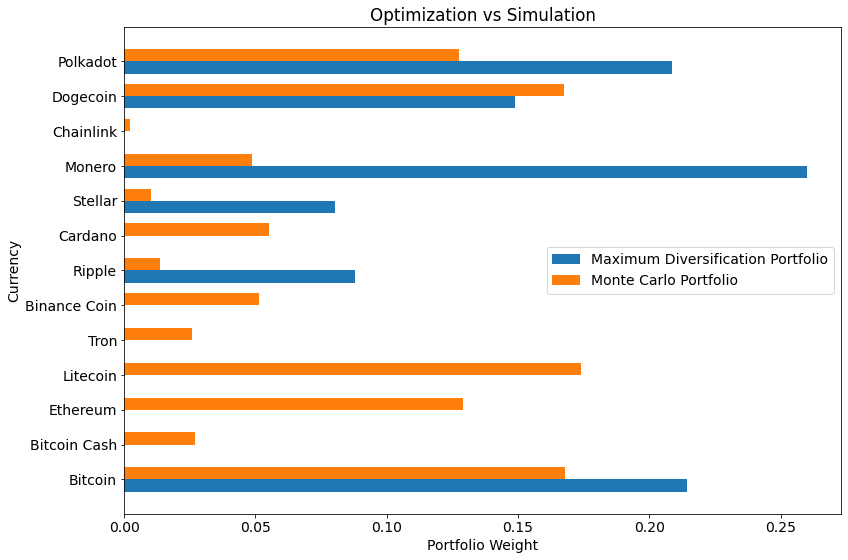

In [98]:
labels = list(tickers.keys())
maxdiv_weights = [round(i,13) for i in list(max_div_results.x)]
mc_weights = [round(i,13) for i in list(best_weights[max_index])]

y = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.barh(y - width/2, maxdiv_weights, width, label='Maximum Diversification Portfolio')
rects2 = ax.barh(y + width/2, mc_weights, width, label='Monte Carlo Portfolio')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Portfolio Weight')
ax.set_ylabel('Currency')
ax.set_title('Optimization vs Simulation')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

## Portfolios Weights

In [99]:
#weights
round_ = 13
monte_carlo_weights = [round(i,round_) for i in list(best_weights[max_index])]
min_vol_weights = [round(i,round_) for i in list(min_vol_weights)]
max_sharpe_weights = [round(i,round_) for i in list(max_sharpe_weights)]
max_div_weights = [round(i,round_) for i in list(max_div_weights)]

## Analysis

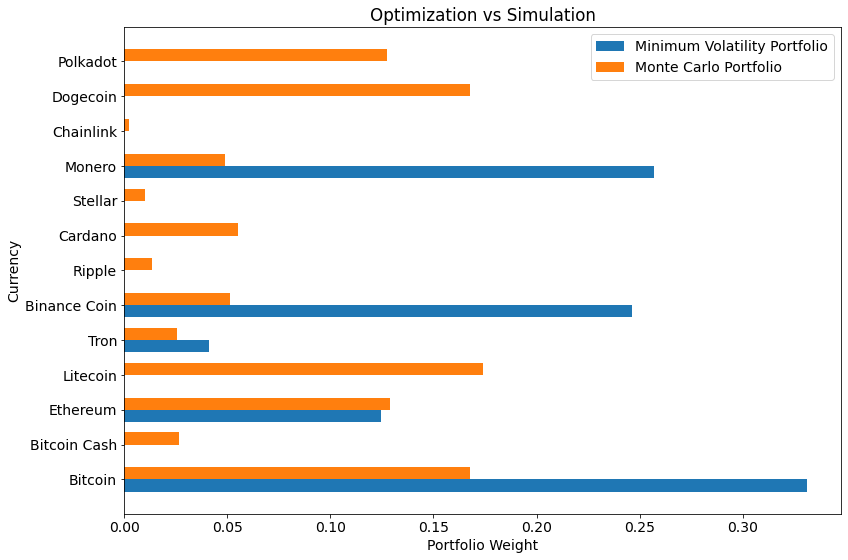

In [100]:
# labels = list(tickers.keys())

y = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.barh(y - width/2, min_vol_weights, width, label='Minimum Volatility Portfolio')
rects2 = ax.barh(y + width/2, monte_carlo_weights, width, label='Monte Carlo Portfolio')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Portfolio Weight')
ax.set_ylabel('Currency')
ax.set_title('Optimization vs Simulation')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

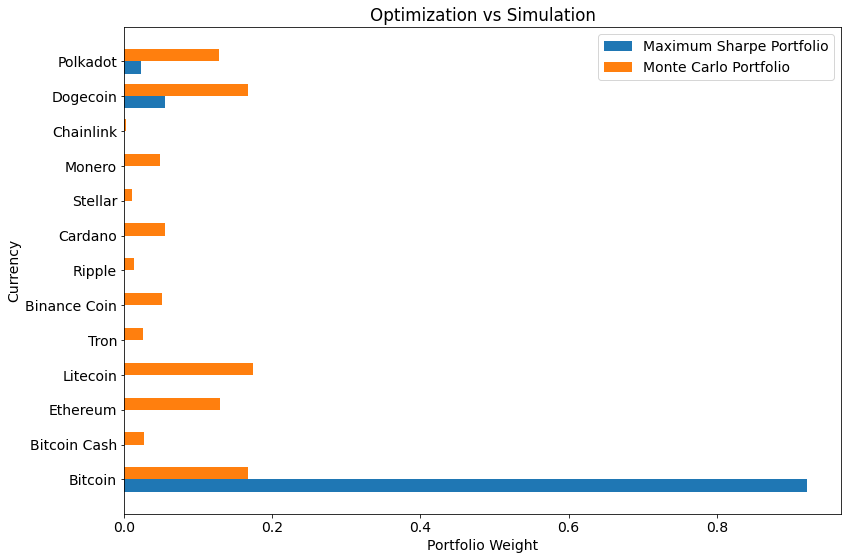

In [101]:
y = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.barh(y - width/2, max_sharpe_weights, width, label='Maximum Sharpe Portfolio')
rects2 = ax.barh(y + width/2, monte_carlo_weights, width, label='Monte Carlo Portfolio')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Portfolio Weight')
ax.set_ylabel('Currency')
ax.set_title('Optimization vs Simulation')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

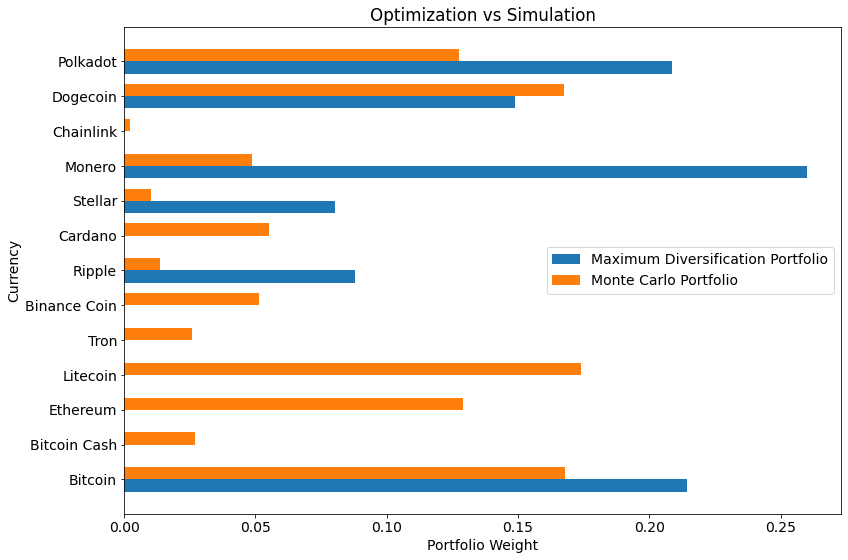

In [102]:
y = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.barh(y - width/2, max_div_weights, width, label='Maximum Diversification Portfolio')
rects2 = ax.barh(y + width/2, monte_carlo_weights, width, label='Monte Carlo Portfolio')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Portfolio Weight')
ax.set_ylabel('Currency')
ax.set_title('Optimization vs Simulation')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

## Portfolio Comparison

In [103]:
principal = 10000

In [104]:
#portfolios
montecarlo_folio = [i*principal for i in monte_carlo_weights] / prices.loc[start]
minvol_folio = [i*principal for i in min_vol_weights] / prices.loc[start]
maxsharpe_folio = [i*principal for i in max_sharpe_weights] / prices.loc[start]
maxdiv_folio = [i*principal for i in max_div_weights] / prices.loc[start]

In [105]:
#random portfolio
np.random.seed(31)
random_weights = np.random.random(n_currencies)
random_weights = random_weights/sum(random_weights)
randomfolio = [i*principal for i in random_weights] / prices.loc[start] 

In [106]:
#even portfolio
evenfolio = [i*principal for i in x0] / prices.loc[start] 

In [110]:
#portfolio returns
montecarlo_returns = montecarlo_folio * prices.loc[end]
minvol_returns = minvol_folio * prices.loc[end]
maxsharpe_returns = maxsharpe_folio * prices.loc[end]
maxdiv_returns = maxdiv_folio * prices.loc[end]
even_returns = evenfolio * prices.loc[end]
random_returns = randomfolio * prices.loc[end]

In [112]:
portfolios = pd.DataFrame({'Portfolio Type':['Random','Even Split','Monte Carlo','Min Volatility','Max Sharpe', 'Maximum Diversification'], 
                           'Profit':[sum(random_returns), sum(even_returns), sum(montecarlo_returns),sum(minvol_returns), sum(maxsharpe_returns), sum(maxdiv_returns)]})
portfolios = portfolios.sort_values(by='Profit', ascending=False)
portfolios.Profit = [round(i,2)-principal for i in portfolios.Profit]

(0.0, 12000.0)

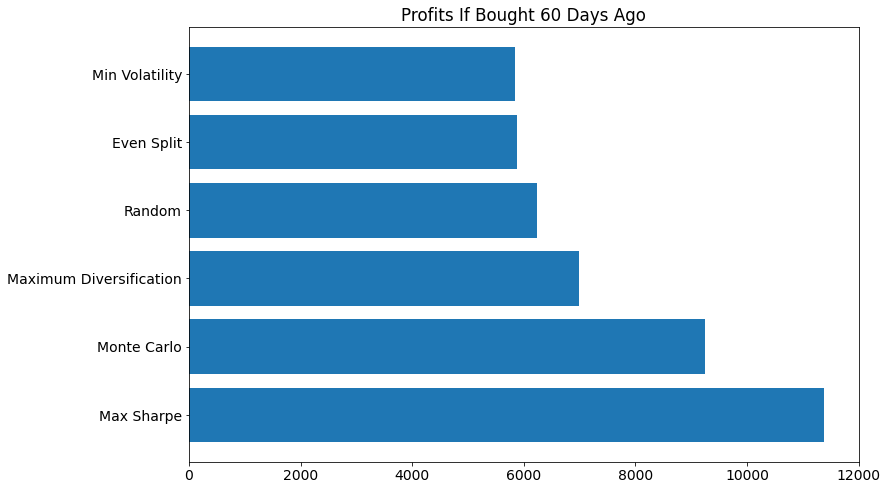

In [113]:
plt.figure(figsize=(12,8))
plt.barh(portfolios['Portfolio Type'],portfolios['Profit'])
plt.title('Profits If Bought 60 Days Ago')
plt.xlim(0,12000)

### Backtest

In [149]:
portfolio_list = [evenfolio, randomfolio, mc_folio, maxdiv_folio, meanvar_folio]

def backtest(portfolio_list,start,end):
    date_range = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
    montecarlo = [sum(mc_folio*prices.loc[i]) for i in date_range]
    meanvar = [sum(meanvar_folio*prices.loc[i]) for i in date_range]
    maxdiv = [sum(maxdiv_folio*prices.loc[i]) for i in date_range]
    even = [sum(evenfolio*prices.loc[i]) for i in date_range]
    random = [sum(randomfolio*prices.loc[i]) for i in date_range]
    data = pd.DataFrame({'Random':random, 'Even Split':even, 'Monte Carlo':montecarlo, 'Maximum Diversification':maxdiv,
    'Mean Variance':meanvar}, index=date_range)
    port_val_over_time = pd.DataFrame(index=date_range, columns=['Random','Even Split','Monte Carlo',
                                            'Mean Variance', 'Maximum Diversification'], data=data)
    return port_val_over_time

In [150]:
port_val_over_time = backtest(portfolio_list, start, end)

Text(0.5, 1.0, 'Backtest: Value of portfolio over time')

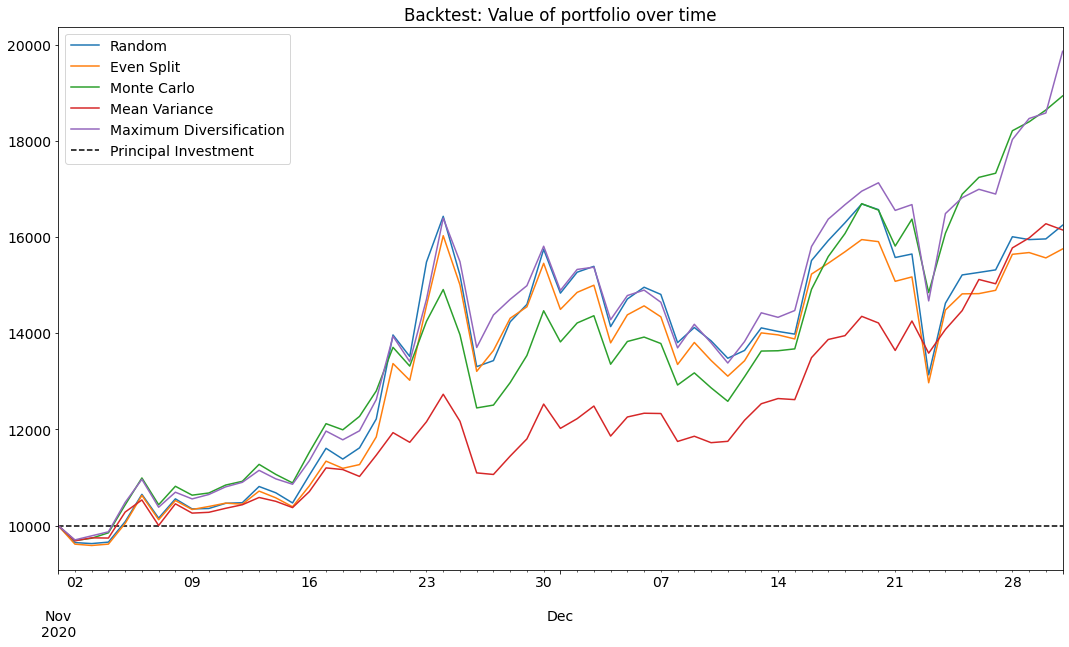

In [151]:
port_val_over_time.plot(figsize=(18,10))
plt.hlines(y=10000, xmin=start, xmax=end, linestyles='--', label='Principal Investment')
plt.legend()
plt.title('Backtest: Value of portfolio over time')